In [1]:
import torch
import random
import sys
sys.path.append('../.')
sys.path.append('../../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
from pgmpy.estimators import PC

**Load data**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'credit'
X = pd.read_csv('../data/german_credit.csv')
target = X.pop('Creditability')
X['Target']=target
X = X.dropna(axis=0)
ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("Target")]
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Target
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,...,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,-0.428290,-0.823318,-0.196014,1.0
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,2.334869,-0.823318,-0.196014,1.0
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,...,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,-0.428290,-0.823318,-0.196014,1.0
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,2.334869,-0.823318,5.101669,1.0
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,-0.428290,-0.823318,5.101669,1.0


**Specify ablation settings**

In [3]:
def get_adj_mat(adj_type, X, n):
    if adj_type == 'ER':
        m = int(n**2*0.1) 
        G = nx.gnm_random_graph(n, m)
        adj_mat = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if (i, j) in list(G.edges):
                    adj_mat[i][j]=1
    elif adj_type == 'COV':
        adj_mat = abs(np.corrcoef(X.to_numpy().T))
    elif adj_type == 'BN':
        c = PC(X)
        model = c.estimate(variant='parallel', max_cond_vars=3, ci_test='pearsonr')
        adj_mat = np.zeros((n, n))
        for i, col_name_i in enumerate(X.columns):
            for j, col_name_j in enumerate(X.columns):
                if (col_name_i, col_name_j) in model.edges():
                    adj_mat[i][j] = 1
    else:
        adj_mat = np.ones((n, n))
    
    plt.figure(figsize=(4, 4))
    im = plt.imshow(adj_mat, cmap='inferno', interpolation='nearest', vmin=0, vmax=1.0)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title('Prior graph')
    plt.axis('off')
    plt.show()
    return adj_mat

**Fit model - compare ablation settings**

In [4]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

Considering ablation setting: ER


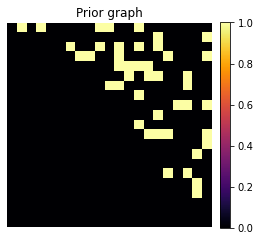

created path to save models...
[Epoch  50/1000, patience  0] train: 19.287, val: 19.134
[Epoch 100/1000, patience 11] train: 19.257, val: 19.125
[Epoch 150/1000, patience  7] train: 19.238, val: 19.099
[Epoch 200/1000, patience  0] train: 19.219, val: 19.071
[Epoch 250/1000, patience  4] train: 19.206, val: 19.059
[Epoch 300/1000, patience 11] train: 19.190, val: 19.049
[Epoch 350/1000, patience  0] train: 19.188, val: 19.034
[Epoch 400/1000, patience  9] train: 19.189, val: 19.049
[Epoch 450/1000, patience 13] train: 19.185, val: 19.039
Training terminated after 486 epochs
Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.264
Detection: 0.766
Performance on real: 0.792, on synth: 0.484
Considering ablation setting: COV


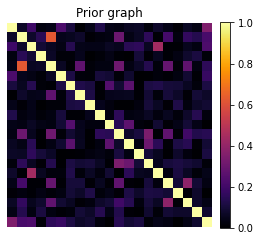

[Epoch  50/1000, patience  0] train: 19.281, val: 19.132
[Epoch 100/1000, patience 11] train: 19.268, val: 19.138
[Epoch 150/1000, patience 14] train: 19.264, val: 19.128
[Epoch 200/1000, patience  0] train: 19.255, val: 19.108
[Epoch 250/1000, patience 50] train: 19.256, val: 19.113
Training terminated after 249 epochs
Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.267
Detection: 0.759
Performance on real: 0.792, on synth: 0.414
Considering ablation setting: BN


  0%|          | 0/3 [00:00<?, ?it/s]

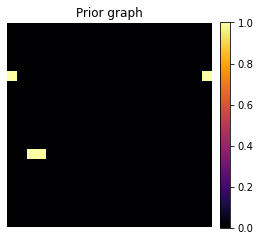

[Epoch  50/1000, patience  0] train: 19.291, val: 19.144
[Epoch 100/1000, patience 12] train: 19.271, val: 19.141
[Epoch 150/1000, patience 14] train: 19.259, val: 19.128
[Epoch 200/1000, patience  0] train: 19.245, val: 19.093
[Epoch 250/1000, patience 10] train: 19.229, val: 19.083
[Epoch 300/1000, patience  5] train: 19.228, val: 19.075
[Epoch 350/1000, patience  0] train: 19.223, val: 19.049
[Epoch 400/1000, patience 50] train: 19.209, val: 19.055
Training terminated after 399 epochs
Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.301
Detection: 0.789
Performance on real: 0.792, on synth: 0.383
Considering ablation setting: DENSE


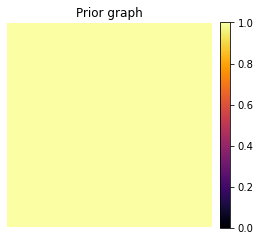

[Epoch  50/1000, patience  0] train: 19.293, val: 19.145
[Epoch 100/1000, patience 12] train: 19.282, val: 19.156
[Epoch 150/1000, patience  4] train: 19.283, val: 19.140
[Epoch 200/1000, patience 42] train: 19.278, val: 19.133
Training terminated after 207 epochs
Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.290
Detection: 0.758
Performance on real: 0.792, on synth: 0.393


In [5]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

for adj_type in ['ER', 'COV', 'BN', 'DENSE']:
    print(f'Considering ablation setting: {adj_type}')
    adj_mat = get_adj_mat(adj_type, X, n=X_train.shape[1])
    gen = GoggleModel(
        ds_name=dataset,
        input_dim=X_train.shape[1],
        encoder_dim=64,
        encoder_l=2,
        het_encoding=True,
        decoder_dim=64,
        decoder_l=2,
        threshold=0.1,
        het_decoder=False,
        graph_prior=torch.Tensor(adj_mat),
        prior_mask=torch.ones_like(torch.Tensor(adj_mat)),
        device='cuda',
        beta=0.1,
        seed=0
    )
    gen.fit(X_train)
    X_synth = gen.sample(X_test)
    res = gen.evaluate_synthetic(X_synth, X_test)
    print(f'Quality: {res[0]:.3f}')
    print(f'Detection: {res[2]:.3f}')
    print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')